<a href="https://colab.research.google.com/github/women-in-ai-ireland/May-2022-WaiXCollins-Airplane-Crash-Investigation/blob/main/WAI_Crash_Investigation_Erumena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analytics Project I: Analysis Airplane Crashes 1908-2019
This template is designed for the Women in AI (WAI) project May 2022 Cohort. The purpose of this project is to expose the WAI participants with a data analytic project related to aerospace and aviation. The objective of this project is to analyze, categorize and visualize airplane crash data. The goal of this project is to provide the paricipants with the tools and technqiues that are applicable to practical data analytics problems in aerospace and aviation. 






Learning Objectives: 
* Data visualization 
* Basic statistical analysis 
* Basic use of Python 
* Basic ML skills

Requirements/Pre-requisits: 
* STEM Background: No
* Data-science/ML/AI: Begginer / limited experience
* Python: Begginer - some experience prefered but not mandatory



Author of the template and mentor for this project: \
Katarina Vuckovic \
Systems Engineer and Data-Scientist at Collins Aerospace\
Contact: katarina.vuckovic@collins.com \

"Airplane Crashes Since 1908" dataset source: 
https://www.kaggle.com/cgurkan/airplane-crash-data-since-1908?select=Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv

Reference Links:
* https://github.com/mrefford/EE_551


In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
%cd drive/My\ Drive/Colab\ Notebooks

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [2]:
from pathlib import Path

print(Path.cwd())  # /home/skovorodkin/stack

/content/drive/My Drive/Colab Notebooks


#Load Dataset

In [3]:
# load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
#df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv')

df=pd.read_pickle("https://github.com/women-in-ai-ireland/May-2022-WaiXCollins-Airplane-Crash-Investigation/raw/main/dataset/Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.pkl")
df.shape

(4967, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   3457 non-null   object 
 2   Location               4963 non-null   object 
 3   Operator               4957 non-null   object 
 4   Flight #               1315 non-null   object 
 5   Route                  4193 non-null   object 
 6   AC Type                4952 non-null   object 
 7   Registration           4694 non-null   object 
 8   cn/ln                  4299 non-null   object 
 9   Aboard                 4949 non-null   float64
 10  Aboard Passangers      4738 non-null   float64
 11  Aboard Crew            4741 non-null   float64
 12  Fatalities             4959 non-null   float64
 13  Fatalities Passangers  4725 non-null   float64
 14  Fatalities Crew        4726 non-null   float64
 15  Grou

In [5]:
#df.head()
#df.tail(5)

In [6]:
df.rename(columns = {'geopyLoc':'Coordinates', 'geopyRoute':'Route_Coordinates'}, inplace = True)

df.columns=df.columns.str.replace(' ','_')

#df.info()

In [7]:
pd.set_option("display.max_colwidth", -1)
df.Summary.head(10)

0    During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge, 26, who was a passenger. This was the first recorded airplane fatality in history.  One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft.  Orville Wright suffered broken ribs, pelvis and a leg.  Selfridge suffered a crushed skull and died a short time later.
1    Eugene Lefebvre was the first pilot to ever be killed in an air accident, after his controls jambed while flying in an air show.                                                                                                                                                                                                                                                                                                                                                             

Advanced exploratory data analysis (EDA) with Python: 
https://medium.com/p/536fa83c578a 

##Task 1 - Categorization and Visualization
###Task 1.1: Categorize by Operator (military, commertial(airline), test, sport...)
 * Define 5-7 categories (Example of categories: military, commertial(airline), test, sport...)
    * Q1: How many planes crashed per category? (sum number of crashes)
    * Q2: How many fatalities per category?     (sum number of fatalities)
    * Hint: make a new column in the dataset
 * Produce bar chart
 * Comment on the results

In [8]:
#create categories of aircraft operators from the operators column
df["Operator_Category"] ="Other"

Operator_Cat = {"Military":["military","army","air force","airforce"],
         "Airline":["airline","air line","airway","aerolin","aero", "Airways"],
         "Private":["private", "Charter", "Jets", "Leasing"],
         "Cargo":["fedex","cargo","service", "US Aerial Mail Services", "Aeropostale"],
         "Air_Taxi":["Helicopter", "Heli", "Helikopter"]
  }

for op_cat in Operator_Cat:
  filter=df["Operator"].str.contains('|'.join(Operator_Cat[op_cat]),case=False,regex=True,na=False)
  df.loc[filter, "Operator_Category"] = op_cat

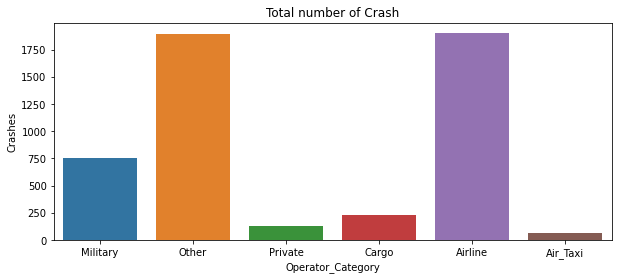

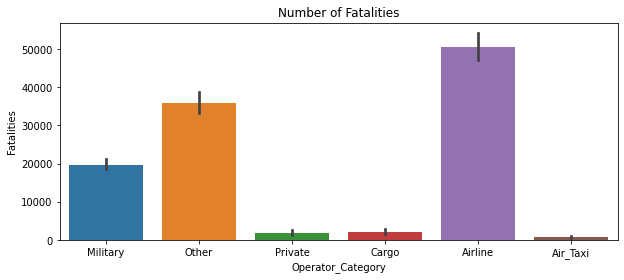

In [9]:
#total number of crashes for each operator category
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='Operator_Category')
plt.title('Total number of Crash')
plt.ylabel('Crashes');


#Total number of fatalities for each operator category
plt.figure(figsize=(10,4))
ax = sns.barplot(x='Operator_Category', y='Fatalities', data=df, estimator=sum)
plt.title('Number of Fatalities');

###Task 1.2: Categorize by AC Type 
 * Define n categories (Boeing, Airbus, Antonov...etc)
    * Q1: How many planes crashed? (sum number of crashes)
    * Q2: How many fatalities?     (sum number of fatalities)
    * Hint: make a new column in the dataset
 * Produce bar chart
 * Comment on the results

 

In [10]:
#Aicraft type is categorised based on manufacturers
df["Aircraft_Category"] ="Other"

Aircraft_Cat = {"Zeppelin":["Zeppelin"],
         "Wright Brothers":["Wright"],
         "Dirigible":["Dirigible"],
         "Curtiss":["Curtiss","Curtis"],
         "De Havilland":["De Havilland"],
         "Farman":["Farman"],
         "Handley":["Handley", "Page"],
         "Junkers":["Breguet"],
         "Bleriot":["Bleriot"],
         "Fokker":["Fokker"],
         "Caudron":["Caudron"],
         "Sikorsky":["Sikorsky"],
         "Douglas":["Douglas", "Dougals", "Mc Donnel", "McDonnell"],
         "Dornier":["Dornier"],
         "Fairchild":["Fairchild"],
         "Boeing":["Boeing"],
         "Avro":["Avro"],
         "Bristol":["Bristol"],
         "Spad":["Spad"],
         "Olivier":["Olivier"],
         "Fokker":["Fokker"],
         "Latecoere":["Latecoere"],
         "Ford":["Ford"],
         "Vickers":["Vickers"],
         "Stinson":["Stinson"],
         "Lockheed":["Lockheed"],
         "Antonov":["Antonov"],
         "Savoia":["Savoia"],
         "Consolidated":["Consolidated"],
         "Short":["Short"],
         "Grumman":["Grumman"],
         "Cessna":["Cessna"],
         "Yakovlev":["Yakovlev"],
         "Beechcraft":["Beechcraft", "Beech"],
         "Tupolev":["Tupolev"],
         "Embraer":["Embraer"],
         "Mil Mi":["Mil Mi","Mi", "MiG"],
         "Airbus":["Airbus","Eurocopter"],
         "Britten Norman":["Britten Norman","Pilatus"],
         "Hawker":["Hawker"],
         "Aero Commander":["Aero Commander"],
         "Ilyushin":["Ilyushin"],
         "Aerospatiale":["Aerospatiale", "Nord"],
         "ATR":["ATR"],
         "BAC":["BAC"],
         "Bell":["Bell"],
         "British Aerospace":["British Aerospace", "BAe"],
         "CASA":["CASA", "Aviocar"],
         "Convair":["Convair"],
         "Dassault":["Dassault"],
         "GAF Nomad":["GAF Nomad"],
         "Learjet":["Gates", "Learjet", "Lear"],
         "Let":["Let"],
         "NAMC":["NAMC"],
         "Piper":["Piper"],
         "Syberjet":["Swearingen"],
         "Sud Aviation Caravelle":["Sud Aviation Caravelle"],
         "Bombardier":["Bombardier", "Canadair"]
  }


for ac_cat in Aircraft_Cat:
  filter=df["AC_Type"].str.contains('|'.join(Aircraft_Cat[ac_cat]),case=False,regex=True,na=False)
  df.loc[filter, "Aircraft_Category"] = ac_cat


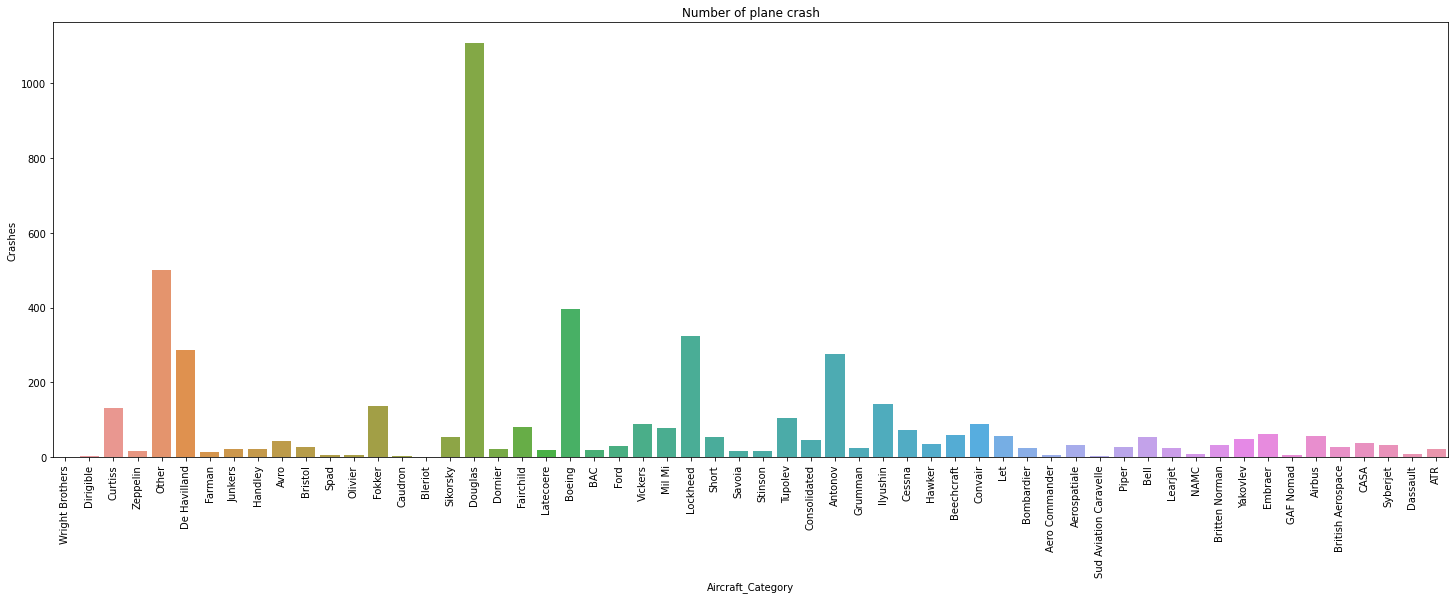

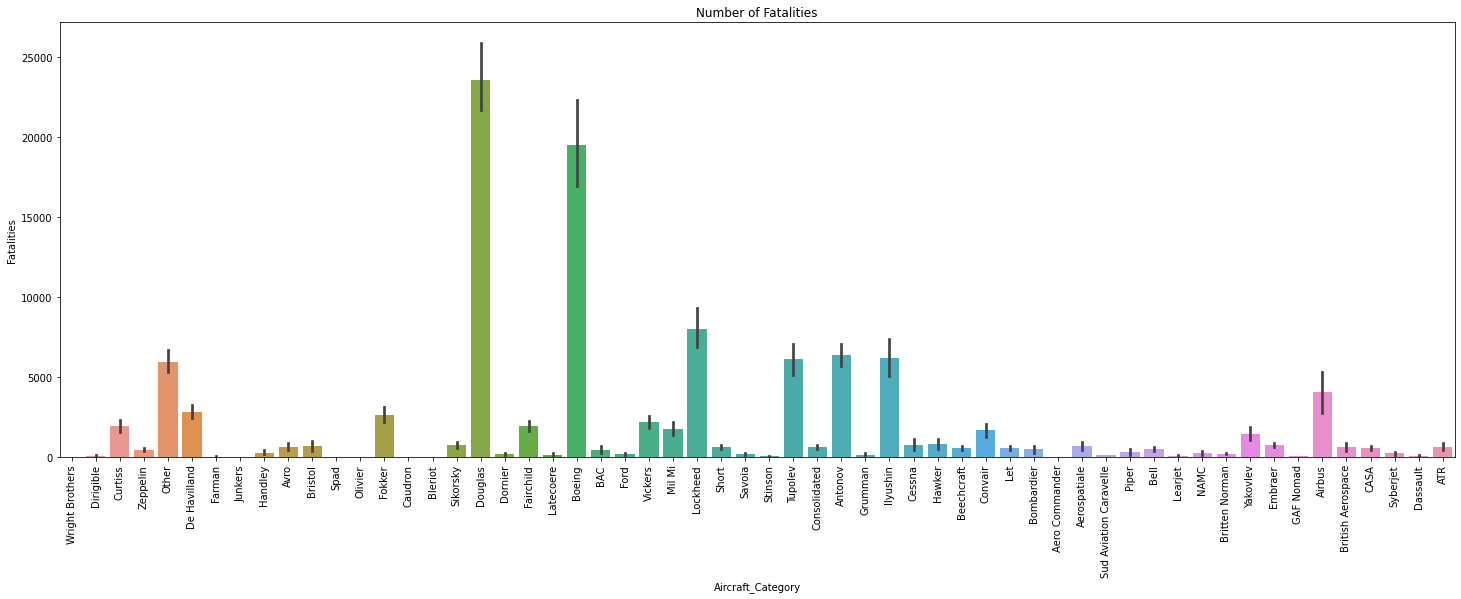

In [11]:
plt.figure(figsize=(25,8))
sns.countplot(data=df,x='Aircraft_Category')
locs, labels = plt.xticks()
plt.setp(labels, rotation = 90)
plt.title('Number of plane crash')
plt.ylabel('Crashes');




plt.figure(figsize=(25,8))
ax = sns.barplot(x='Aircraft_Category', y='Fatalities', data=df, estimator=sum)
locs, labels = plt.xticks()
plt.setp(labels, rotation = 90)
plt.title('Number of Fatalities');

###Task 1.3: Categorize by Year and Time of the Day
* Use plots to visualize:
    1. plot year vs. number of chashes
    2. caterize time of failure into morning, afternoon, evening, and night based on "time".  
    * Hint: you will need to add a new column to the DB to create a new category
* plot bar or pie chart of number of crashes vs time of the day. 
* **Bonus** - Cross correlate year with type of aircraft. For example, the majority of crashes during WWII will be military. Can you identify and explain some other trends?

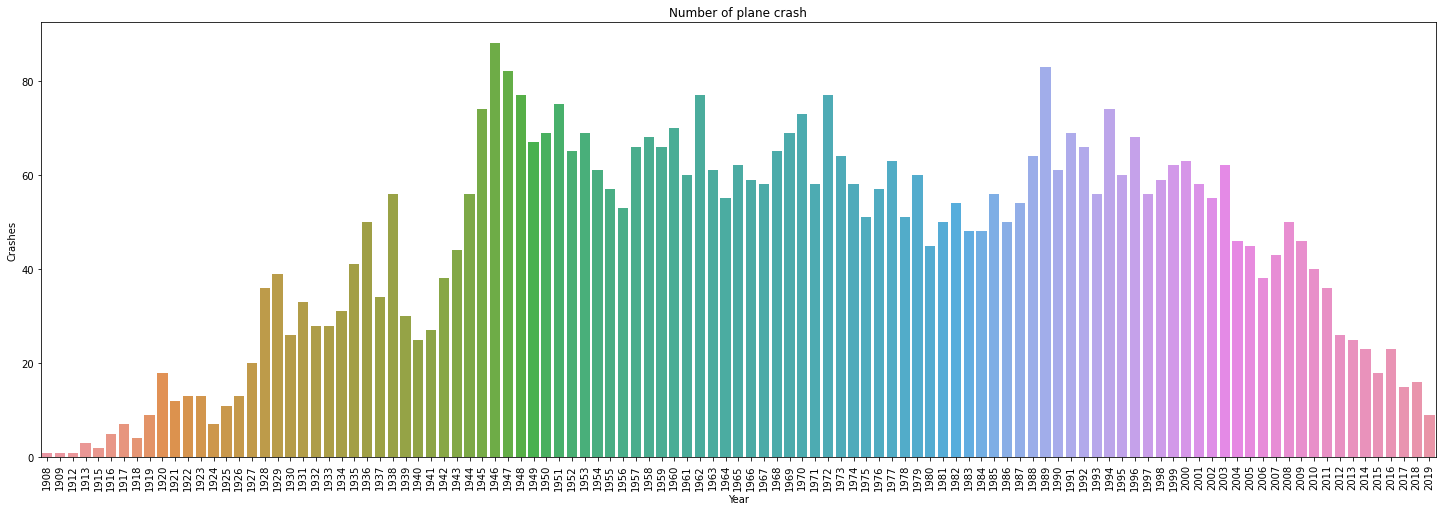

In [12]:
df['Year'] = pd.to_datetime(df.Date).dt.year
plt.figure(figsize=(25,8))
sns.countplot(data=df,x='Year')
locs, labels = plt.xticks()
plt.setp(labels, rotation = 90)
plt.title('Number of plane crash')
plt.ylabel('Crashes');



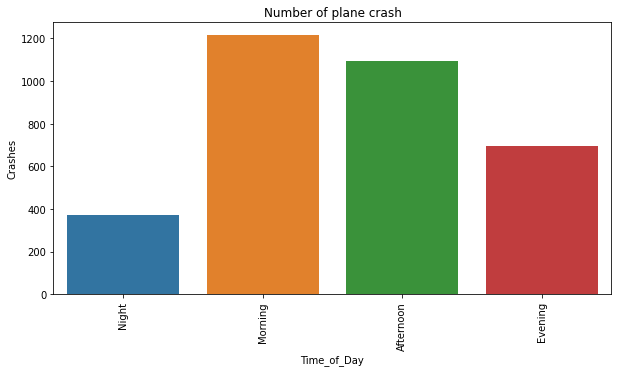

In [13]:
bins = [0,5,12,18,24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
time = pd.to_datetime(df.Time, errors ='coerce').dt.hour
df["Time_of_Day"]=pd.cut(time, bins, labels=labels)

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Time_of_Day')
locs, labels = plt.xticks()
plt.setp(labels, rotation = 90)
plt.title('Number of plane crash')
plt.ylabel('Crashes');

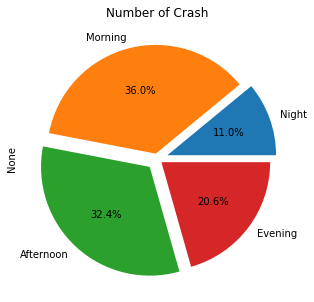

In [14]:
plt.figure(figsize=(10,5))
df.groupby("Time_of_Day").size().plot.pie(autopct='%0.1f%%',
explode=(0.1,0.05, 0.1, 0.05),title="Number of Crash")
plt.show()


###Task 1.4: Perform EDA 
* Read the Advanced exploratory data analysis (EDA) with Python: https://medium.com/p/536fa83c578a
* Apply EDA on your dataset.
  * What else does the EDA tell you about dataset?

In [15]:
df['Aircraft_Category'].value_counts()

Douglas                   1107
Other                     500 
Boeing                    397 
Lockheed                  324 
De Havilland              288 
Antonov                   277 
Ilyushin                  142 
Fokker                    136 
Curtiss                   133 
Tupolev                   106 
Convair                   90  
Vickers                   89  
Fairchild                 82  
Mil Mi                    79  
Cessna                    72  
Embraer                   61  
Beechcraft                60  
Airbus                    58  
Let                       56  
Bell                      55  
Short                     54  
Sikorsky                  53  
Yakovlev                  49  
Consolidated              45  
Avro                      43  
CASA                      39  
Hawker                    36  
Aerospatiale              34  
Syberjet                  33  
Britten Norman            33  
Ford                      31  
British Aerospace         28  
Piper   

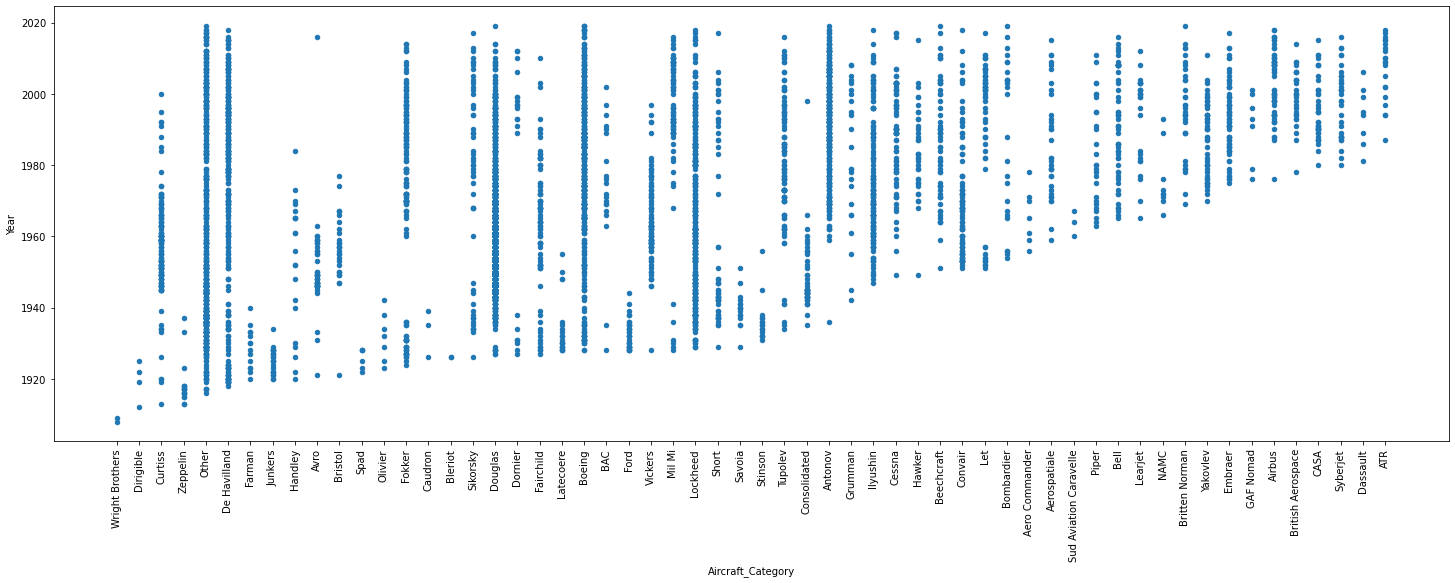

In [16]:
var = "Year"
data = pd.concat([df["Aircraft_Category"],df[var]], axis=1)
data.plot.scatter(x="Aircraft_Category",y=var,  figsize=(25,8))
locs, labels=plt.xticks()
plt.setp(labels,rotation=90);

In [17]:
#Boeing and Airbus is analysed because they are competitors
Boeing = df[df["Aircraft_Category"]=="Boeing"]
Airbus = df[df["Aircraft_Category"]=="Airbus"]
df_bng_bus = pd.concat([Boeing, Airbus], ignore_index =True)


In [18]:
#A new column was created for Boeing aircrafts with more than 3 accident for a model and Airbus aircrafts with more than 2 accident for a mode
df_bng_bus["Boeing_Airbus_Model"] = "Others"
Bng_Bus_Type = {"Boeing 40":["Boeing 40"],
                "Boeing KC-135A":["Boeing KC-135A"],
                "Boeing B-707-321B":["Boeing B-707-321B"],
                "Boeing 247D":["Boeing 247D"],
                "Boeing 247":["Boeing 247"],
               "Boeing B-737-200":["Boeing B-737-200"],
                "Boeing B-737-2A8":["Boeing B-737-2A8"],
               "Boeing B-707-321C":["Boeing B-707-321C"],
                "Boeing B-747":["Boeing B-747"],
                "Boeing B-737-222":["Boeing B-737-222"],
               "Boeing 95":["Boeing 95"],
                "Boeing B-29":["Boeing B-29"],
                "Boeing B-727-231":["Boeing B-727-231"],
                "Boeing B-707-331B":["Boeing B-707-331B"],
                "Boeing B-727-224":["Boeing B-727-224"],
                "Boeing B-727-64":["Boeing B-727-64"],
                "Boeing 707-321C":["Boeing 707-321C"],
                "Boeing B-747-121":["Boeing B-747-121"],
                "Boeing Vertol CH-47":["Boeing Vertol CH-47"],
                "Airbus A320-211":["Airbus A320-211"],
                "Airbus A321-231":["Airbus A321-231"],
                "Airbus A320-111":["Airbus A320-111"],
                "Airbus A310-304":["Airbus A310-304"],
                "Airbus A300B4-622R":["Airbus A300B4-622R"],
                "Airbus A320-232":["Airbus A320-232"],
                "Airbus A310-324":["Airbus A310-324"],
                "Airbus A-320-233":["Airbus A-320-233"]      
  }

for air_cat in Bng_Bus_Type:
  filter=df_bng_bus["AC_Type"].str.contains('|'.join(Bng_Bus_Type[air_cat]),case=False,regex=True,na=False)
  df_bng_bus.loc[filter, "Boeing_Airbus_Model"] = air_cat


In [19]:
#unique values
df_bng_bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Date                   455 non-null    object  
 1   Time                   398 non-null    object  
 2   Location               455 non-null    object  
 3   Operator               455 non-null    object  
 4   Flight_#               273 non-null    object  
 5   Route                  414 non-null    object  
 6   AC_Type                455 non-null    object  
 7   Registration           441 non-null    object  
 8   cn/ln                  416 non-null    object  
 9   Aboard                 454 non-null    float64 
 10  Aboard_Passangers      439 non-null    float64 
 11  Aboard_Crew            439 non-null    float64 
 12  Fatalities             455 non-null    float64 
 13  Fatalities_Passangers  438 non-null    float64 
 14  Fatalities_Crew        438 non-null    flo

In [20]:
#investigation of non-numeric variables 
df_bng_bus.describe(exclude="number")

,Date,Time,Location,Operator,Flight_#,Route,AC_Type,Registration,cn/ln,Summary,Coordinates,Route_Coordinates,Operator_Category,Aircraft_Category,Time_of_Day,Boeing_Airbus_Model
count,455,398,455,455,273,414,455,441,416,453,387,367,455,455,387,455
unique,448,303,419,227,242,385,346,441,415,453,326,358,6,2,4,27
top,09/11/2001,19:20,"Rome, Italy",Military - U.S. Air Force,006,Training,Boeing 40,NC280,1044,The air mail plane crashed into a grove of cottonwood trees and burned. Businessman F.H. Craig was killed and pilot Frank Yegar injured. The pilot descended in altitude due to air pockets.The plane then ran into an air pocket that brought the plane down into the grove of trees.,"(Manila, Capital District, Metro Manila, Philippines, (14.5948914, 120.9782618))","[(Kathmandu, Bagmati Pradesh, Nepal, (27.708317, 85.3205817)), (New Delhi, Delhi, India, (28.6138954, 77.2090057))]",Airline,Boeing,Morning,Others
freq,4,5,4,33,3,16,13,1,2,1,5,2,213,397,138,309


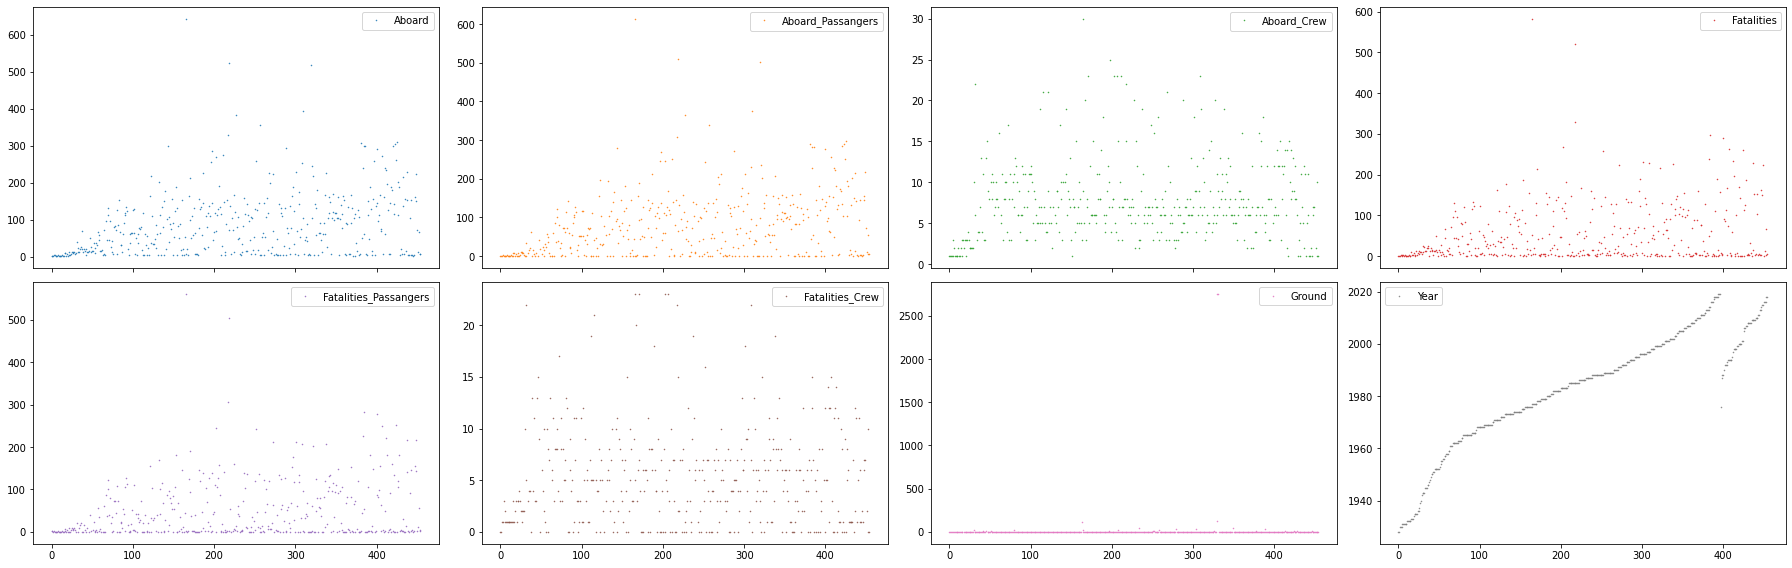

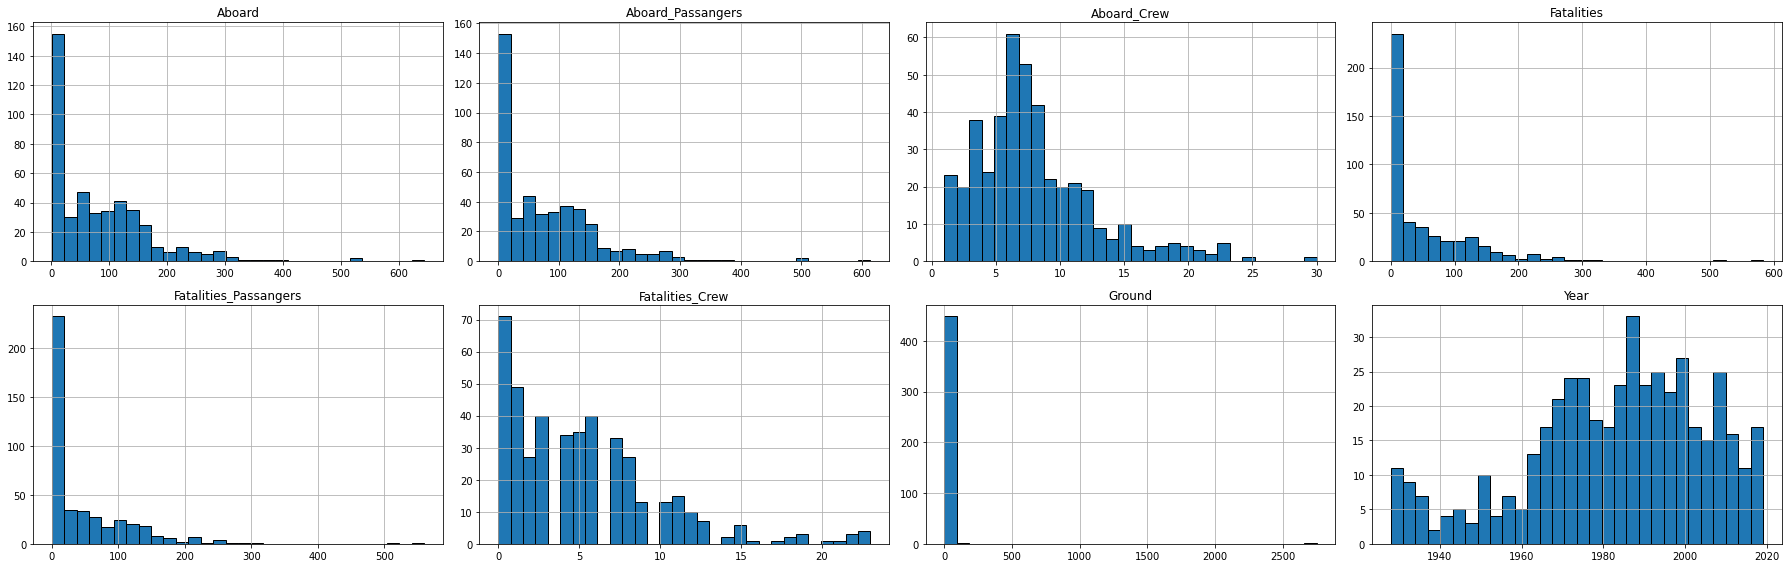

In [21]:
#global view of numeric variables of the dataset
df_bng_bus.plot(lw=0,marker=".",subplots=True,layout=(2,4),figsize=(25,8),markersize=1)
plt.tight_layout();

#plot histogram to detect outliers
df_bng_bus.hist(bins=30, figsize=(25, 8), layout=(2,4), edgecolor="black")
plt.tight_layout();
#an outlier was detected in the Ground variable, which is related to the 9/11 incident


In [22]:
#investigation of numeric variables
df_bng_bus.describe(include = "number")

,Aboard,Aboard_Passangers,Aboard_Crew,Fatalities,Fatalities_Passangers,Fatalities_Crew,Ground,Year
count,454.000000,439.000000,439.000000,455.000000,438.000000,438.000000,452.000000,455.000000
mean,85.026432,78.753986,7.717540,51.909890,47.972603,5.221461,13.617257,1982.690110
std,88.261748,85.575802,4.825014,71.975052,69.851914,4.783055,182.857552,21.888348
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1928.000000
25%,12.000000,5.000000,5.000000,4.000000,0.000000,1.000000,0.000000,1969.000000
50%,63.500000,58.000000,7.000000,16.000000,12.000000,4.000000,0.000000,1986.000000
75%,129.750000,124.000000,10.000000,82.500000,79.750000,7.000000,0.000000,1999.000000
max,644.000000,614.000000,30.000000,583.000000,560.000000,23.000000,2750.000000,2019.000000


In [23]:
df_bng_bus=df_bng_bus.drop(['Aboard_Passangers','Aboard_Crew','Fatalities_Crew','Fatalities_Passangers'], axis = 1)

In [24]:
#missing values
total = df_bng_bus.isnull().sum().sort_values(ascending=False)
percent=(df_bng_bus.isnull().sum()/df_bng_bus.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(17)

,Total,Percent
Flight_#,182,0.400000
Route_Coordinates,88,0.193407
Time_of_Day,68,0.149451
Coordinates,68,0.149451
Time,57,0.125275
Route,41,0.090110
cn/ln,39,0.085714
Registration,14,0.030769
Ground,3,0.006593
Summary,2,0.004396


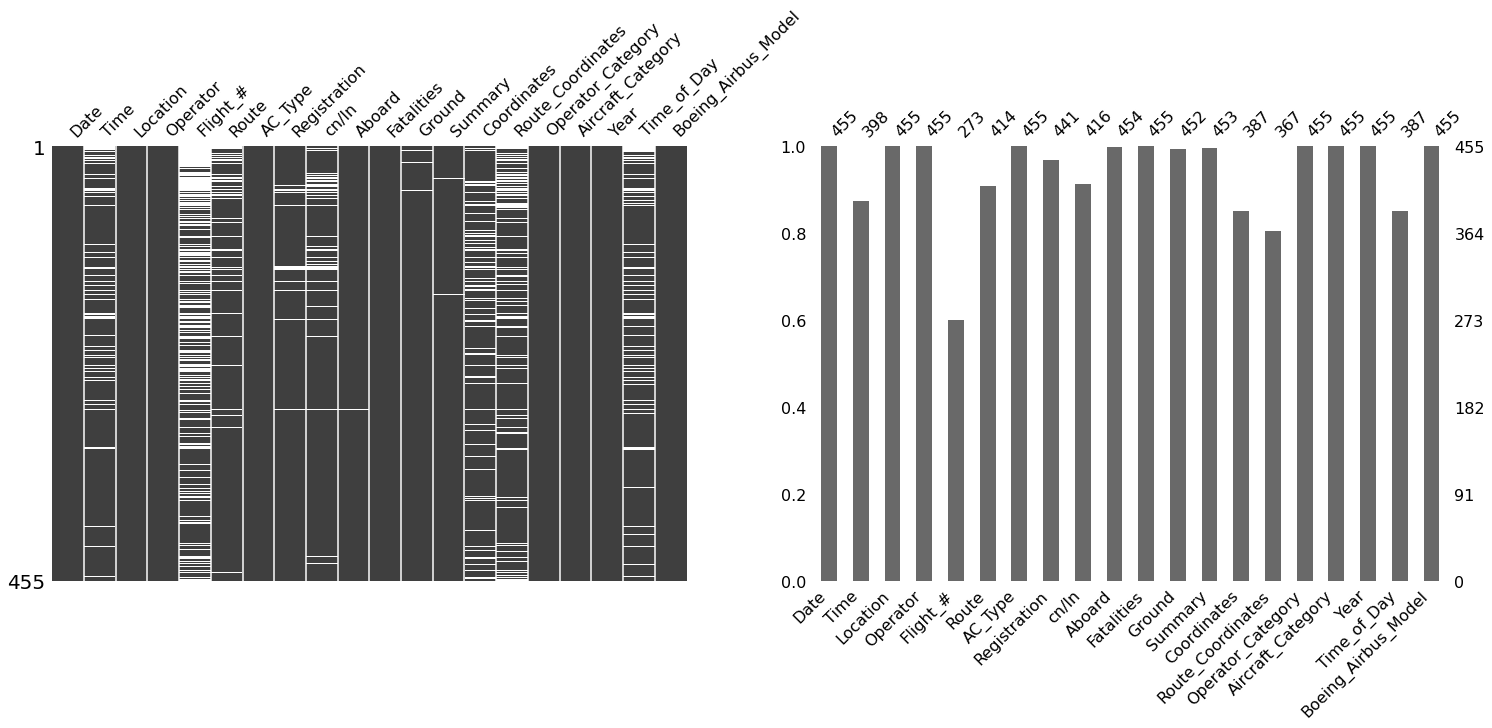

In [25]:
fig, axs = plt.subplots(1,2,figsize=(25, 8))
msno.matrix(df_bng_bus, labels=True,ax=axs[0],figsize=(10, 4));
msno.bar(df_bng_bus, labels=True,ax=axs[1],figsize=(10, 4));
plt.show()

In [26]:
cols_continuous=df_bng_bus.select_dtypes(include="number").nunique()>=10

df_continuous=df_bng_bus[cols_continuous[cols_continuous].index]

df_continuous.shape

(455, 4)

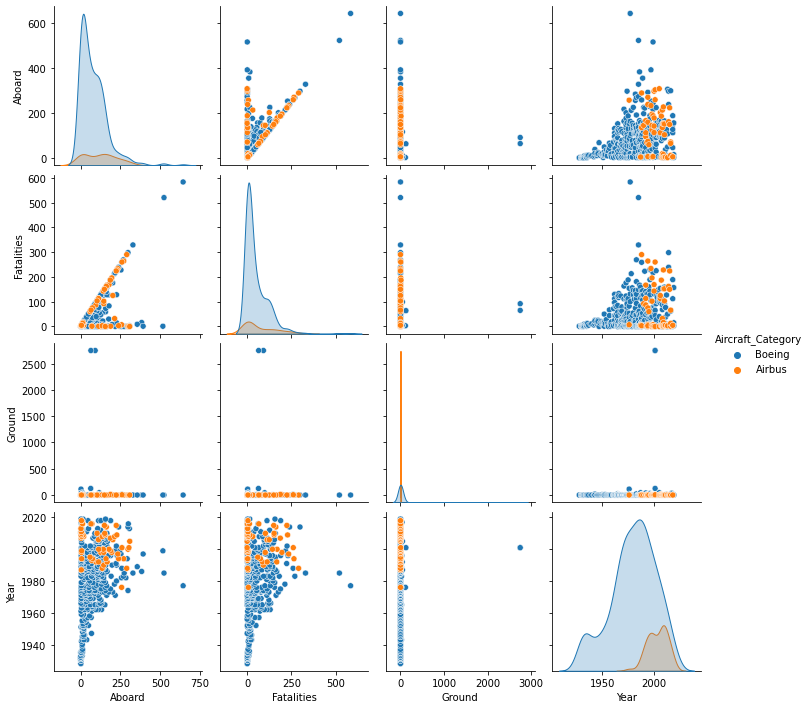

In [27]:
#visualise relationship between numerical variables with Operator Category as the target variable
sns.pairplot(df_bng_bus, hue='Aircraft_Category');

Using Operator category variable as the target to determine the relationships between numerical variables, Airline category has more crashes.

In [64]:
df_bng_bus=df_bng_bus.drop(['Ground'], axis = 1)

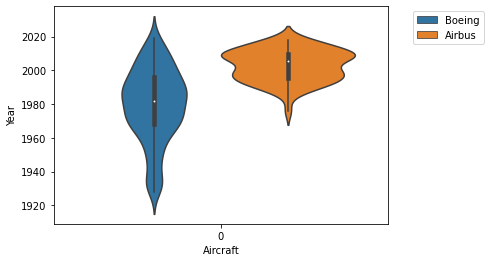

In [65]:
df_bng_bus["Aircraft"] = 0
sns.violinplot(data = df_bng_bus, x="Aircraft", y ="Year",hue="Aircraft_Category")
plt.legend(bbox_to_anchor=(1.3,1));

In [66]:
bng_bus = pd.concat([Boeing, Airbus], ignore_index =True)
Aircraft_bins = [1960,1970,1980,1990,2000,2010,2020]
labels = ["1960-1969", "1970-1979","1980-1989","1990-1999","2000-2009","2010-2019"]
df_bng_bus["BngBus_bins"]=pd.cut(bng_bus.Year,Aircraft_bins,labels=labels)

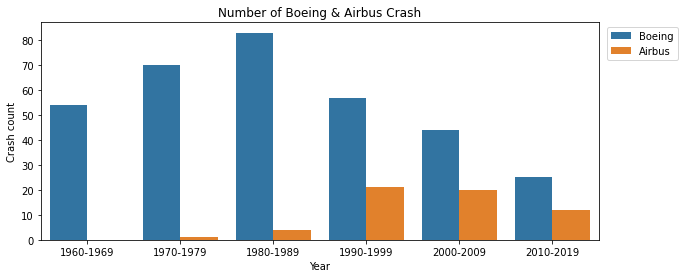

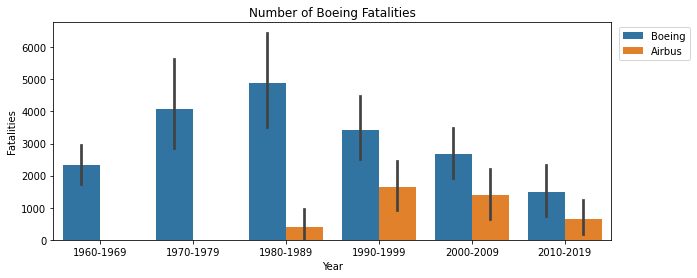

In [67]:
#Number of Boeing and Airbus Crash
plt.figure(figsize=(10,4))
sns.countplot(data=df_bng_bus,x='BngBus_bins', hue='Aircraft_Category')
plt.title('Number of Boeing & Airbus Crash')
plt.xlabel('Year')
plt.ylabel('Crash count')
plt.legend(bbox_to_anchor=(1.15,1));


#Boeing and Airbus Fatalities
plt.figure(figsize=(10,4))
ax = sns.barplot(x='BngBus_bins', y='Fatalities', data=df_bng_bus, estimator=sum, hue='Aircraft_Category')
plt.title('Number of Boeing Fatalities')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.15,1));

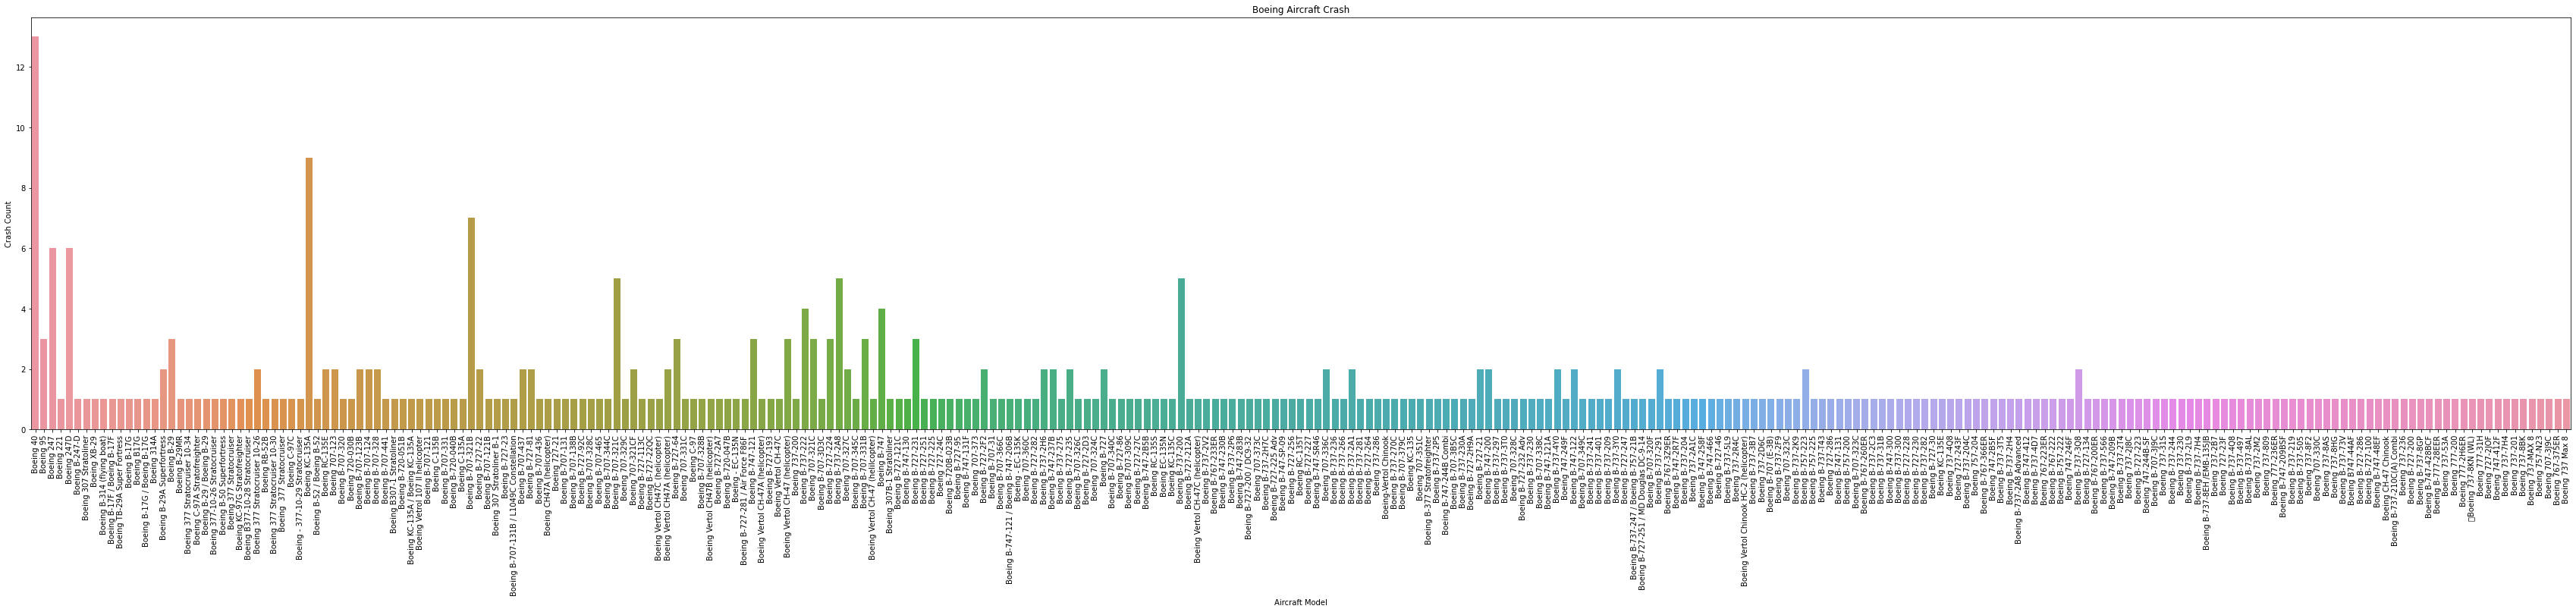

In [68]:
#Crash of each Boeing model 
plt.figure(figsize=(60,10))
sns.countplot(data=Boeing, x='AC_Type')
plt.xticks(rotation=90)
plt.title('Boeing Aircraft Crash')
plt.xlabel('Aircraft Model')
plt.ylabel('Crash Count');


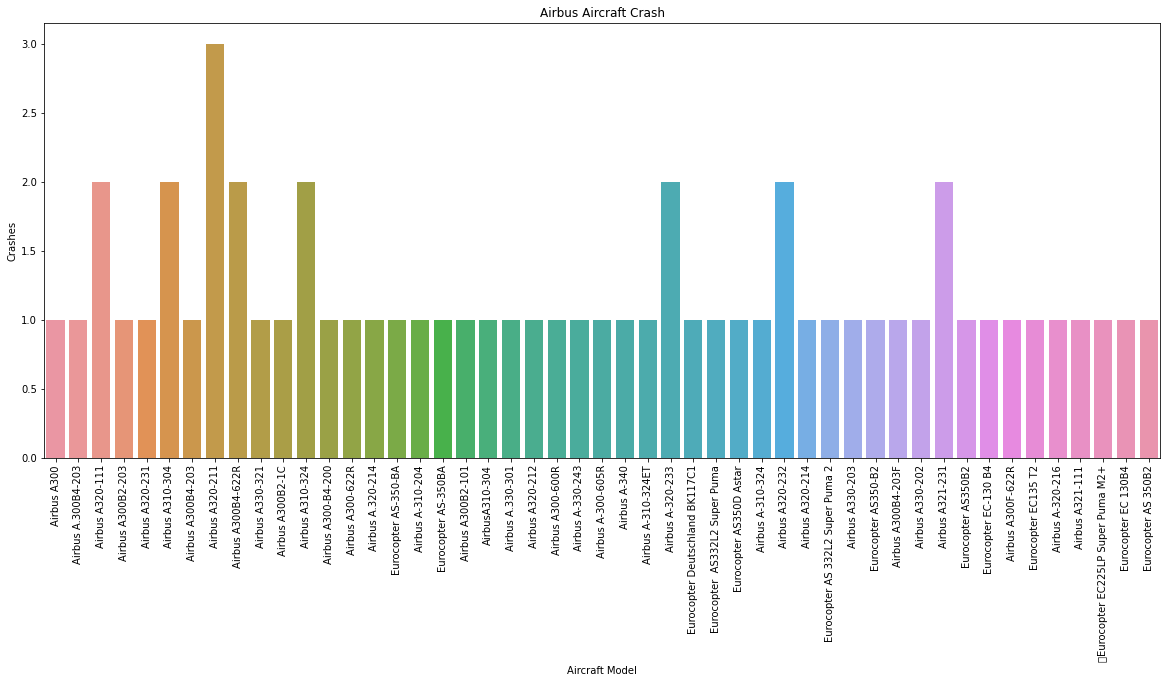

In [69]:
#Crash of each Airbus model
plt.figure(figsize=(20,8))
sns.countplot(data=Airbus, x='AC_Type')
plt.xticks(rotation=90)
plt.title('Airbus Aircraft Crash')
plt.xlabel('Aircraft Model')
plt.ylabel('Crashes');

In [70]:
df_aircrafts = df_bng_bus.drop(index=df_bng_bus[df_bng_bus["Boeing_Airbus_Model"]=="Others"].index)

In [71]:
df_aircrafts.Boeing_Airbus_Model.head(100)

0      Boeing 40        
1      Boeing 40        
2      Boeing 95        
3      Boeing 40        
4      Boeing 40        
         ...            
237    Boeing B-747     
242    Boeing B-747     
248    Boeing KC-135A   
250    Boeing B-737-2A8 
251    Boeing B-707-321C
Name: Boeing_Airbus_Model, Length: 100, dtype: object

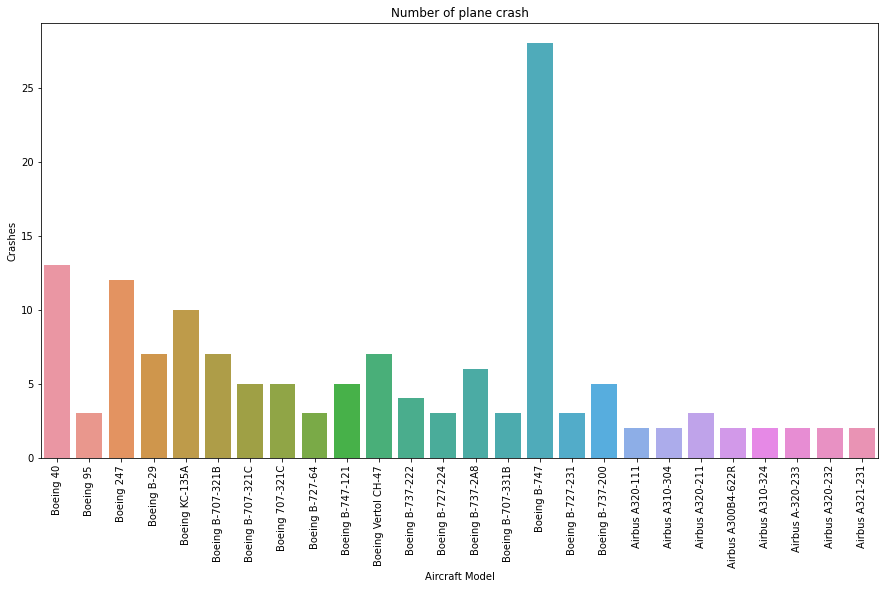

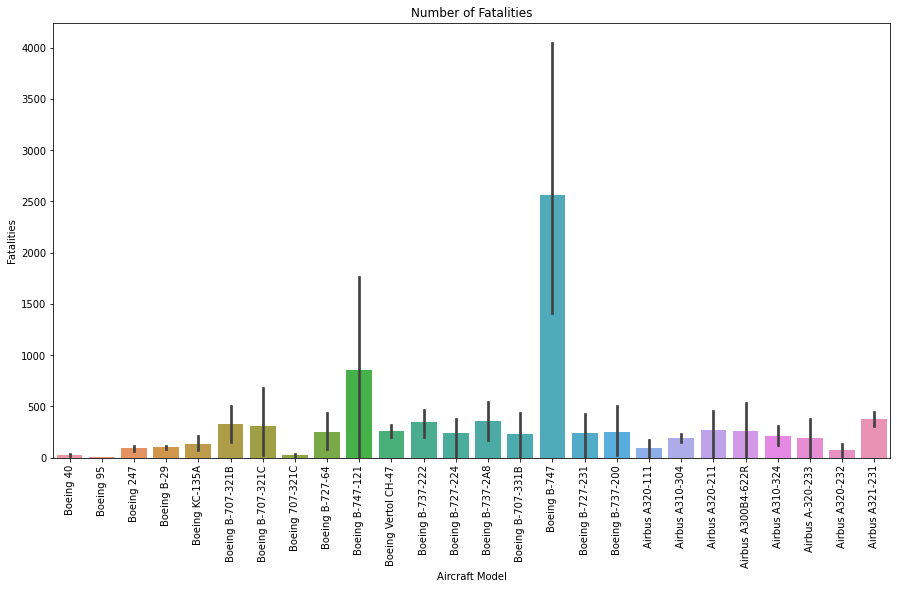

In [72]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_aircrafts,x='Boeing_Airbus_Model')
plt.xticks(rotation=90)
plt.title('Number of plane crash')
plt.xlabel('Aircraft Model')
plt.ylabel('Crashes');



plt.figure(figsize=(15,8))
ax = sns.barplot(x='Boeing_Airbus_Model', y='Fatalities', data=df_aircrafts, estimator=sum)
plt.xticks(rotation=90)
plt.title('Number of Fatalities')
plt.xlabel('Aircraft Model');

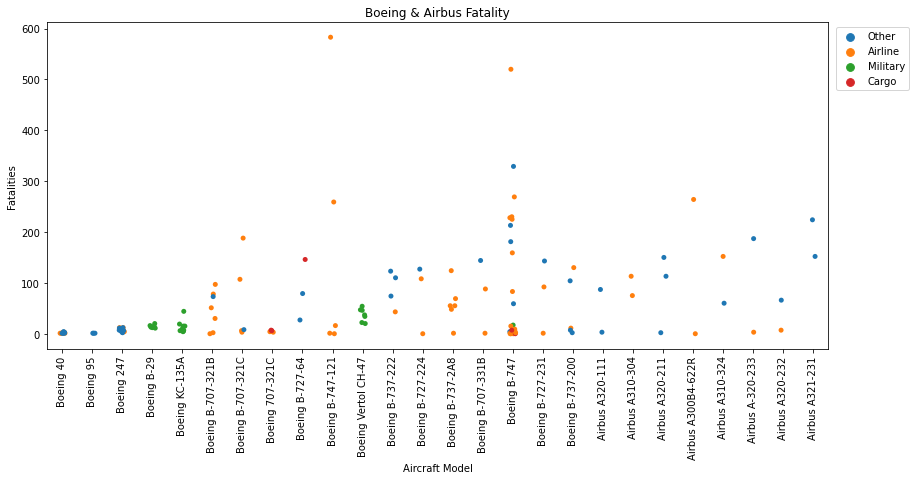

In [74]:
plt.figure(figsize=(14,6))
ax = sns.stripplot(x="Boeing_Airbus_Model", y="Fatalities", hue = "Operator_Category", data=df_aircrafts)
plt.xticks(rotation=90)
plt.title("Boeing & Airbus Fatality")
plt.xlabel('Aircraft Model')
plt.legend(bbox_to_anchor=(1.11,1));

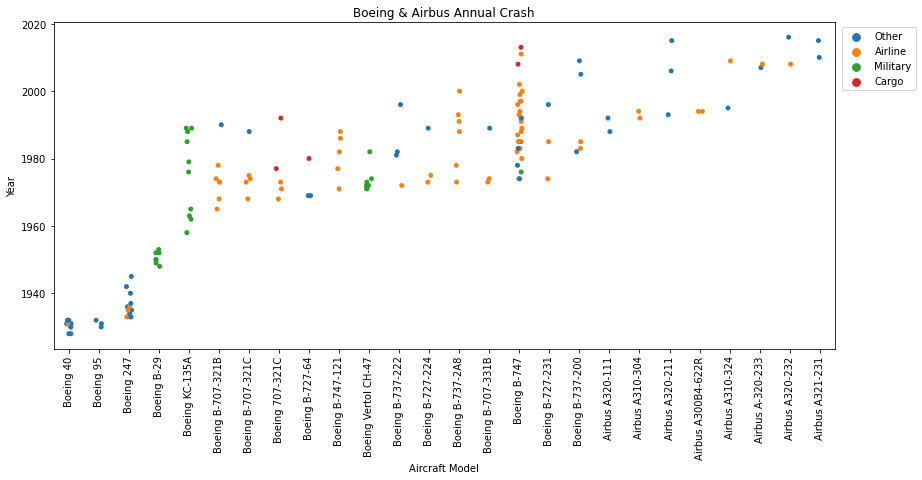

In [77]:
plt.figure(figsize=(14,6))
ax = sns.stripplot(x="Boeing_Airbus_Model", y="Year", hue = "Operator_Category", data=df_aircrafts)
plt.xticks(rotation=90)
plt.title("Boeing & Airbus Annual Crash")
plt.xlabel('Aircraft Model')
plt.legend(bbox_to_anchor=(1.11,1));

## Task 2: Implement Text Search Analysis
* Implement a text search function that can search for key words in the "summary" and provide all instances that reference the words you are searching for. 
* List all aircraft that crashed due to: 
    1. weather (search by rain, storm..etc), 
    2. shot in combat (search shot)
    3. collision (search collide, collision...)
    4. approach/landing
* **Bonus**:
    * Think of your own categories. What would be useful and why? 
    * Correlate 2 or more keywords. 
* Discuss results, produce graphs or charts if nessary to support your discussion.

referenece: 
https://www.kaggle.com/del=3f79407a7fc1ab98/text-analysis-for-aircraft-crashes-causes/notebook

In [78]:
df_bng_bus.Summary.head(100)

0     The air mail plane crashed into a grove of cottonwood trees and burned. Businessman F.H. Craig was killed and pilot Frank Yegar injured. The pilot descended in altitude due to air pockets.The plane then ran into an air pocket that brought the plane down into the grove of trees.                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
1     Spatial disorientation after entering a snowstorm.                                                                                                                                                                                                               

In [79]:
df["Crash_Cause"]="Unknown"
cause_cats={"Weather":["rain*","storm*","snowstorm*","wind","severe weather","thunderstorm*","turbulence","weather related","haze","weather was poor",
                       "lightning","fog","wind sheer","icing","weather condition*","foggy","headwinds","snow","sunstroke","poor weather","poor weater","inclement weather",
                       "bad weather","low altitude","poor visibility","low visibility","heavy rain*","low cloud*","blizzard","low overcast","mountain wave","downdrafts"],
            "Combat":["shot down","combat","hit by","heavy fighting","shot it"],
            "Collision":["collide","collision"],
            "Unknown":["unknown","never found"],
            "Collision":["Midair collision", "midair collision","collided","collision","impacted"],
            "Pilot_Error":["Pilot error","Negligence","stunting","stunting","standard route","IFR flight","adhere","low pass","opioids",
                           "flight path","intoxicated","pilot's decision","fatigued","disorientation","request bearings"],
            "technical_fault":["controls jambed","engine failure","fuel supply","technical problem*","hydraulics","hydraulic failure","experienced a fire","stick shaker","pressure system",
                                 "engine trouble","asymetric fuel","ATC lost radar","Exploded","lost power","losing power","malfunction in the engine","navigation equipment",
                                 "fire erupted","fuel exhaustion","structural failure","tailspin","training","starboard","broken wing strut","broken wire",
                                 "engine fire","engine failed","flight fire","faulty design","malfunctioning controls","engine problem*","propeller","mayday",
                                 "test","hydrogen gas","caught fire","flutter","lost contact","mechanical problem*","distress call","out of fuel","rotor separating","aircraft stalled",
                               "engine * fire", "experimental","refueling","lost control","minor problem*","reported a fire", "triggered","steering hardware","improper loading",
                               "fuel system","autorotation","declared an emergency","fuselage failure","plane stalled","ocillation","erroneous","stalled condition",
                               "wing separated","difficulties","mechanical difficulties","detached","sufficient speed","vertical bank","engine faiure","all engines"],
            "Landing":["emergency landing","landing gear","descent","go-around","lost height","while landing","run off","swamp","attempting to land","attempted to land",
                       "attemptting to land","losing altitude","hard landing","circling"],
            "Takeoff":["approach","takeoff","attempting to take off","taking off","gain* altitude","gaining altitude","lost altitude","take off","took off","liftoff"]
         }

for cause in cause_cats:
  filter=df["Summary"].str.contains('|'.join(cause_cats[cause]),case=False,regex=True,na=False)
  df_bng_bus.loc[filter, "Crash_Cause"] = cause

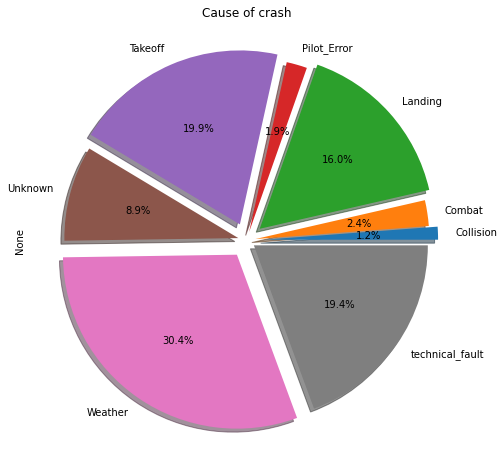

In [80]:
df_bng_bus.groupby("Crash_Cause").size().plot.pie(autopct='%0.1f%%',
explode=(0.1,0.05, 0.1, 0.05,0.1,0.05, 0.1, 0.05),title="Cause of crash", figsize=(20,8), shadow=True)
plt.show()


In [81]:
df_models = df_bng_bus.drop(index=df_bng_bus[df_bng_bus["Boeing_Airbus_Model"]=="Others"].index)

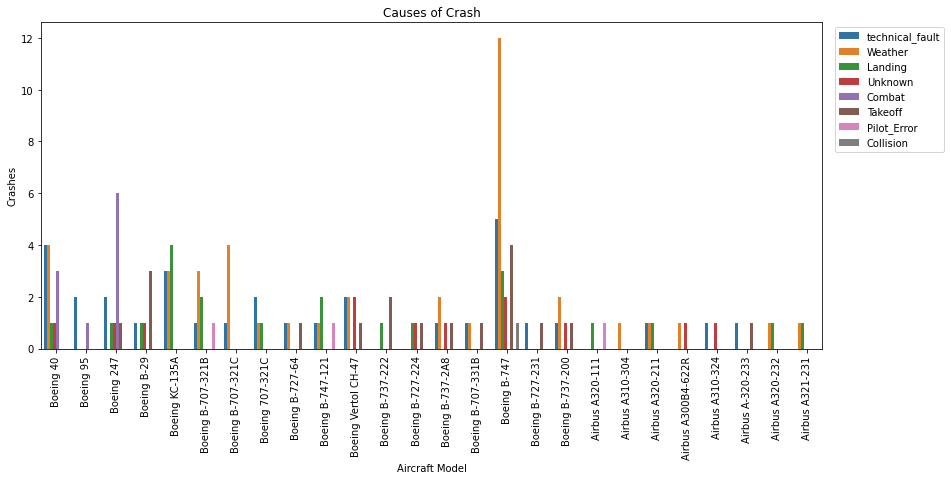

In [82]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_models,x='Boeing_Airbus_Model', hue='Crash_Cause')
plt.title('Causes of Crash')
plt.xticks(rotation=90)
plt.xlabel('Aircraft Model')
plt.ylabel('Crashes')
plt.legend(bbox_to_anchor=(1.01,1));

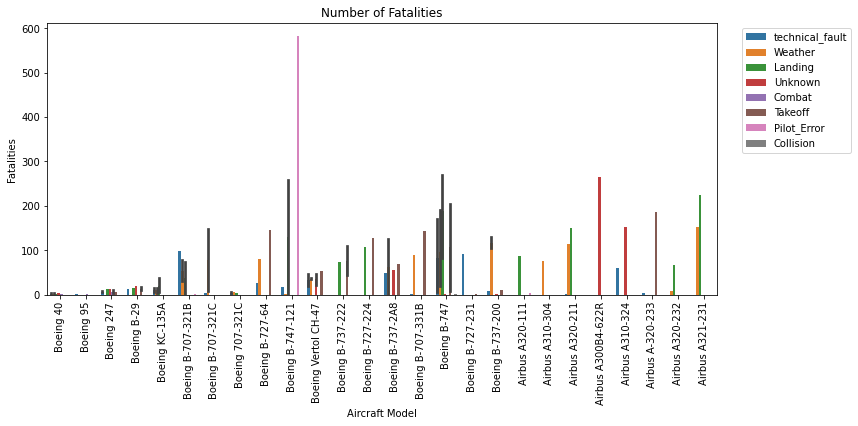

In [83]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x='Boeing_Airbus_Model', y='Fatalities', data=df_models, hue='Crash_Cause')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.03,1))
plt.xlabel('Aircraft Model')
plt.title('Number of Fatalities');

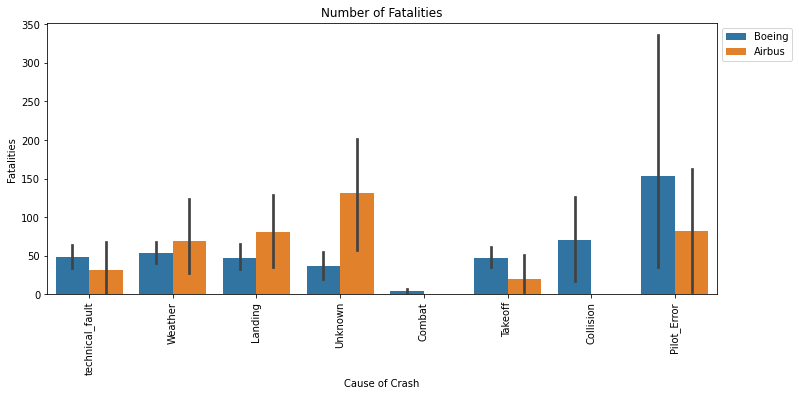

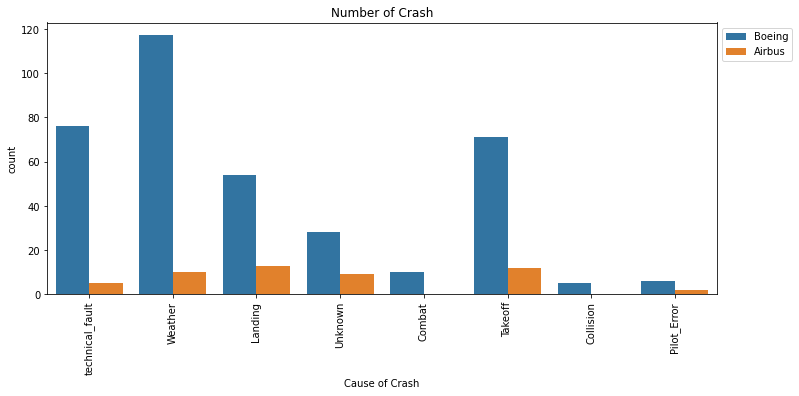

In [84]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x='Crash_Cause', y='Fatalities', data=df_bng_bus, hue='Aircraft_Category')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.12,1))
plt.xlabel('Cause of Crash')
plt.title('Number of Fatalities');




plt.figure(figsize=(12,5))
ax = sns.countplot(x='Crash_Cause', data=df_bng_bus, hue='Aircraft_Category')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.12,1))
plt.xlabel('Cause of Crash')
plt.title('Number of Crash');

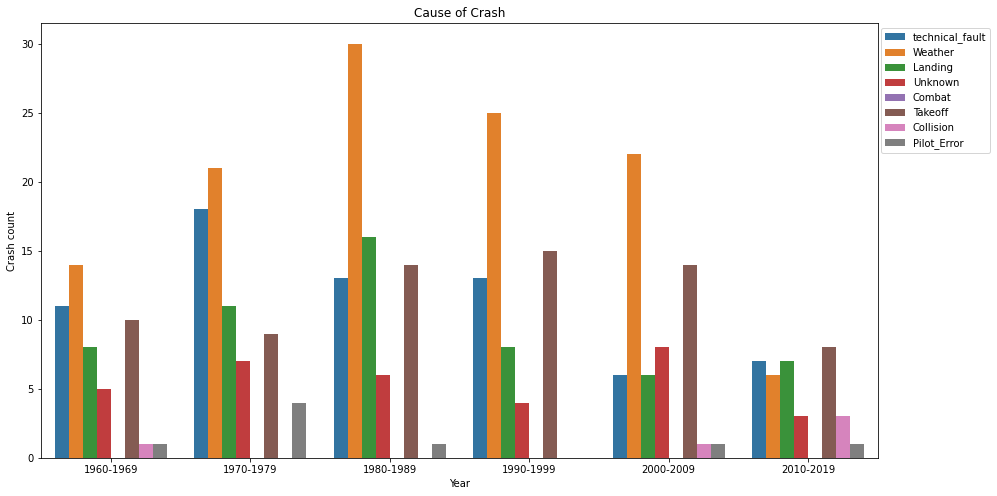

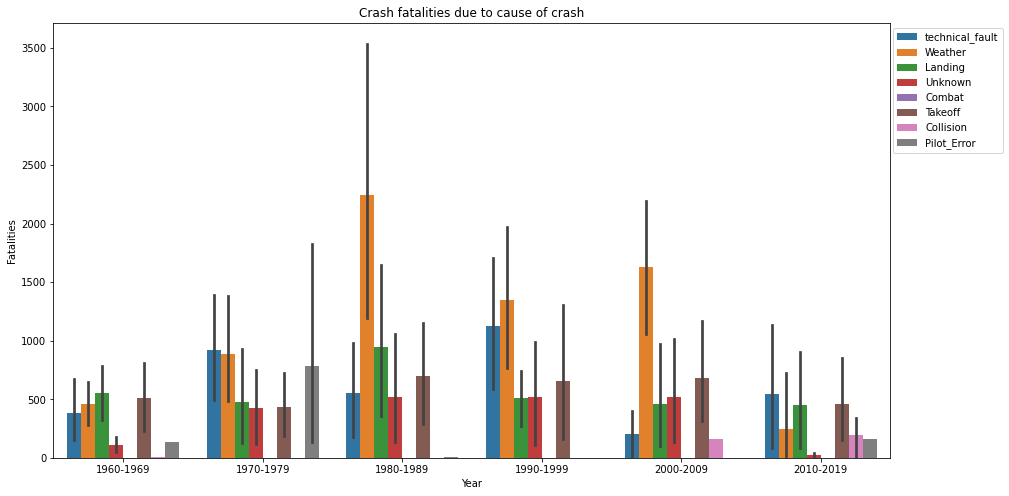

In [85]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_bng_bus,x='BngBus_bins', hue='Crash_Cause')
plt.title('Cause of Crash')
plt.xlabel('Year')
plt.ylabel('Crash count')
plt.legend(bbox_to_anchor=(1.14,1));



plt.figure(figsize=(15,8))
ax = sns.barplot(x='BngBus_bins', y='Fatalities', data=df_bng_bus, estimator=sum, hue='Crash_Cause')
plt.title('Crash fatalities due to cause of crash')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.14,1));

## Task 3: Plot Crash on Map


### Task 3.1: Plot Location of the crash on the map
* Plot location of all crashes on the mapG
* Generate heat map based on frequency of crash occurances 
* Cluster area of high crash occurance and categorize them from highest to lowes
* Generate heat map based on the number of fatalities
  * How does it compare to the heat map in 2nd bullet? 
* **Bonus**: Think of your own idea and implement it. What would be useful to add to the map view and why?
* **Hint**: You will first need to convert the "Location" column to longitude and latitude coordinates. Feel free to use any library for this task. However, one way to do this is to use the "geopy" library. 
Note: Geopy does require you to create an account. 

In [86]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
!git clone https://github.com/DenisCarriere/geocoder
%cd geocoder


fatal: destination path 'geocoder' already exists and is not an empty directory.
/content/drive/MyDrive/Colab Notebooks/geocoder/geocoder


In [88]:
!python setup.py install

python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [51]:
%pip install --upgrade folium

import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy import distance



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:

import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from folium import plugins
folium.__version__

'0.12.1.post1'

In [90]:
geolocator = Nominatim(user_agent="geoapiExercises")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=3)

In [91]:
df_bng_bus["latitude"]=df_bng_bus["Coordinates"].apply(lambda loc: loc.latitude if isinstance(loc, geopy.location.Location) else None)
df_bng_bus["longitude"]=df_bng_bus["Coordinates"].apply(lambda loc: loc.longitude if isinstance(loc, geopy.location.Location) else None)

In [93]:
df_bng_bus.dropna(subset=['latitude','longitude'], inplace = True)

In [107]:
m = folium.Map([13.752544, 100.493473], tiles = 'stamen terrain', zoom_start=5)
mc = MarkerCluster().add_to(m)

In [108]:
for i, row in df_bng_bus.iterrows():

  lat = df_bng_bus.at[i,'latitude']
  lon = df_bng_bus.at[i,'longitude']
  crash_site = df_bng_bus.at[i, 'Location']

  if row["Aircraft_Category"]=="Boeing":

    symbol=folium.Icon(color="blue", icon = "plane", prefix = "fa")
  else:
    symbol = folium.Icon(color="red", icon = "plane", prefix ="fa" )

  folium.Marker(location=[lat,lon],popup=crash_site, tooltip="click", icon = symbol).add_to(mc)


In [109]:
m

In [98]:
m = folium.Map([13.752544, 100.493473], tiles = 'stamen terrain', zoom_start=5)

maps = df_bng_bus[['latitude', 'longitude', 'Fatalities']]

heat_map = [[row['latitude'], row['longitude'], row['Fatalities']]for index, row in maps.iterrows()]

HeatMap(heat_map).add_to(m)

In [61]:
m

###Task 3.2: Plot Trajectories/Routes on Map
* Plot trajectories and routes
* Annotate with the AC registration 
* **Bonus**: Make it selectable such that you can pick such that the use can pick: date range, AC type, operator, registration

Note: If you cannot do it for the entire dataset. Choose a smaller subset.

In [105]:
def draw_route(df_bng_bus):
  map = folium.Map([0, 0], zoom_start=2, control_scale=True, width="%100",height="%100")
  colorCode_AC={"Boeing":"red","Airbus":"blue"}
  for i,row in df_bng_bus.iterrows():
    if isinstance(row["Route_Coordinates"], list):
      tooltip=f'Route: {row["Route"]}'
      popup=f'Date: {row["Date"]}\n\nAC_Type: {row["AC_Type"]}'
      color=colorCode_AC.get(row["Aircraft_Category"],"green")
      plugins.AntPath([(x.latitude,x.longitude) for x in row["Route_Coordinates"]], color=color,tooltip=tooltip,popup=popup, weight=2, opacity=0.5).add_to(map)
  return map

In [106]:
map=draw_route(df_bng_bus.tail(100))
map

###Task 3.3: Correlation Location and Weather 
* For each region identify what the key weather words are. 
* Are there some areas that have more crashses due to weather? 
* Can you identify what type of weather? (rain, winds...etc).
* Create confusion matrix (x-weather and y-location)
* **Bonus**: Correlate location with other "key words" (i.e. departure, pilot error..etc)

Note: this part requires combining task 2 and task 3

## Task 4: Implement K-means Clustering 

The purpose of this task is to implement k-means clustering to identify correlations between different parameters identified in the previous tasks (heat map).

###Task 4.1: K-means clustering
* Apply k-means to different groups of data to identify correlations.
* Test different k values
  * Is there an obvios best k?

Reference: 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### Task 4.2: K-means Optimization 
* Apply K-means optimization to find the best k-value using 2 different methods: 
  * Elbow method
  * Silhuette method
* Discuss result
  * Which method is better and why?